Juypter notebook for generating figures for paper from QObj files generated from simulations.

Author: Brandon Furey and Philipp Schindler - 2024

Dependencies: QObj files generated by simulations

In [12]:
# IMPORT MODULES
import qutip as q
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import scipy.optimize as opt
from sympy.physics.wigner import wigner_3j
import statsmodels.stats.api as sms
from rot_qec_counter import *

cm = 1/2.54  # centimeters in inches

# revtext template textwidths for figures
figwidth_1col = 8.6
figwidth_2col = 17.8

Set up QECC

In [2]:
code_manifold = 7  # J manifold to encode in linear rotor
buffer_up = 3  # Additional buffer levels up (at least one for absorption and one more if second-order effects to be studied)
buffer_do = code_manifold  # Additional buffer levels down (at least one for absorption and one more if second-order effects to be studied)
max_l = code_manifold + buffer_up  # Maximum J manifold to consider
min_l = code_manifold - buffer_do  # Minimum J manifold to consider
cs_m1 = 2  # m1 value to encode countersymmetric code in
cs_m2 = 5  # m1 value to encode countersymmetric code in

Create instance of QECC

In [3]:
code = CounterSymmetricCode(
    max_l, code_manifold, cs_m1, cs_m2, min_l
)  # instance of counter-symmetric class for [7,2,5] counter-symmetric code embedded in max_l Hilbert space

print(
    "number of states = " + str(len(code.l_m_list))
)  # print list of [l,m] tuples up to max_l

print(
    "counter-symmetric code J = "
    + str(code.code_manifold)
    + ", m1 = "
    + str(code.m1)
    + ", m2 = "
    + str(code.m2)
)

number of states = 121
counter-symmetric code J = 7, m1 = 2, m2 = 5


Plot QECC states

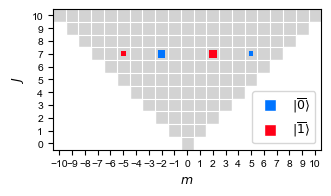

In [4]:
# old figwidth = 8.60cm
fig = plt.figure(figsize=(figwidth_1col*cm,5*cm))
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 9}
plt.rc('font', **font)
plt.tick_params(axis='both', which='major', labelsize=7.5)

blue_color = '#0074FF' # corresponds to cmap_shift = -0.10
red_color = '#FF0017' # corresponds to cmap_shift = -0.10
legend_elements = [Line2D([0], [0], marker='s', color='w', markerfacecolor=blue_color, markersize=8, label='$|\overline{0}\\rangle$'), Line2D([0], [0], marker='s', color='w', markerfacecolor=red_color, markersize=8, label='$|\overline{1}\\rangle$')]

code.rot_hinton(
    code.psi_m,
    cm_ident=False,
    cm_ident_color="magenta",
    vector_hinton=True,
    cmap_shift= -0.10,
    ax_color='k',
    ax_facecolor='#D3D3D3',
    ax_bkgdcolor="white",
    label_color="k",
    grid_bool=True,
    grid_color="w"
) # cmap_shift = -0.04
fig.patch.set_alpha(1)
legend = plt.legend(
    handles=legend_elements, loc='lower right', fancybox=True, shadow=False,frameon=1,ncol=1
)
plt.tight_layout()
plt.savefig("images/codewords_725_rothinton.pdf")

Plot simple $J$-repumping DEC example for rotational ladder operator applying $\delta J = 1$ and $\delta m = 0$ to $\hat{\rho}_0$

fidelity of |J_C-1,m_C> state with code state at last time in evolution = 0.9742763189095246
fidelity of |J_C+1,m_C> state with code state at last time in evolution = 0.9872458133419006


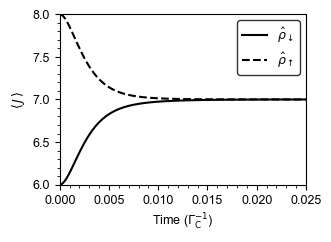

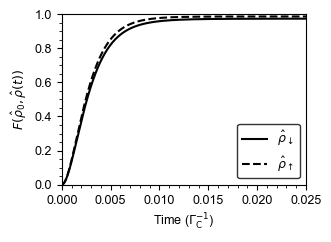

In [5]:
results_1a = q.qload('qobj_files//results_1a')
results_1b = q.qload('qobj_files//results_1b')

max_time_1 = max(results_1a.times)
plot_time_factor = 0.5
times_1 = results_1a.times
num_times_1 = int(len(times_1) * plot_time_factor)

fig1,ax1 = plt.subplots(figsize=(figwidth_1col*cm,6.33*cm))
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 9}
plt.rc('font', **font)

plt.xlim([0, plot_time_factor*max_time_1])
plt.ylim([5.9998, 8.001])
plt.plot(
    times_1,
    results_1a.expect[0],
    "k-",
    label="$\hat{\\rho}_{\downarrow}$",
)
plt.plot(
    times_1,
    results_1b.expect[0],
    "k--",
    label="$\hat{\\rho}_{\\uparrow}$",
)
plt.xlabel("Time ($\Gamma_{\\text{C}}^{-1}$)")
plt.ylabel("$\langle\, J\, \\rangle$")

COLOR = 'k'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rc('axes',edgecolor=COLOR)

legend = plt.legend(loc='upper right', fancybox=True, shadow=False,frameon=1,ncol=1)
frame = legend.get_frame()
frame.set_facecolor((1,1,1,1))
frame.set_edgecolor(COLOR)

fig1.patch.set_alpha(1)
ax1.set_facecolor(color=(1,1,1,1))
ax1.minorticks_on()
plt.tight_layout()

plt.savefig("images\simple_correction_1_j.pdf",facecolor=fig1.get_facecolor(),dpi=300)

fig2,ax2 = plt.subplots(figsize=(figwidth_1col*cm,6.33*cm))
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 9}
plt.rc('font', **font)
plt.xlim([0, 0.5 * max_time_1])
plt.ylim([0, 1])
plt.plot(
    times_1,
    [
        q.fidelity(code.psi_0, results_1a.states[i].ptrace(0)) ** 2
        for i in range(len(results_1a.states))
    ],
    "k-",
)
plt.plot(
    times_1,
    [
        q.fidelity(code.psi_0, results_1b.states[i].ptrace(0)) ** 2
        for i in range(len(results_1b.states))
    ],
    "k--",
)
plt.xlabel("Time ($\Gamma_{\\text{C}}^{-1}$)")
plt.ylabel("$F (\hat{\\rho}_0, \hat{\\rho} (t) )$")

legend = plt.legend(
    [
        "$\hat{\\rho}_{\downarrow}$",
        "$\hat{\\rho}_{\\uparrow}$",
    ], loc='lower right', fancybox=True, shadow=False,frameon=1,ncol=1
)
frame = legend.get_frame()
frame.set_facecolor((1,1,1,1))
frame.set_edgecolor(COLOR)

fig2.patch.set_alpha(1)
ax2.set_facecolor(color=(1,1,1,1))
ax2.minorticks_on()
plt.tight_layout()

# plt.title('Evolution of physical fidelity with correct code state')
plt.savefig("images\simple_correction_1_physfid.pdf",facecolor=fig2.get_facecolor(),dpi=300)

print(f"fidelity of |J_C-1,m_C> state with code state at last time in evolution = {q.fidelity(code.psi_0, results_1a.states[num_times_1].ptrace(0)) ** 2}")
print(f"fidelity of |J_C+1,m_C> state with code state at last time in evolution = {q.fidelity(code.psi_0, results_1b.states[num_times_1].ptrace(0)) ** 2}")

Plot simple Zeeman DEC example for rotational ladder operator applying $\delta J = 0$ and $\delta m = 1$ to $\hat{\rho}_0$

fidelity of |J_C,m_C-1> state with code state at last time in evolution = 0.9944362474920936
fidelity of |J_C,m_C+1> state with code state at last time in evolution = 0.9944362474920936


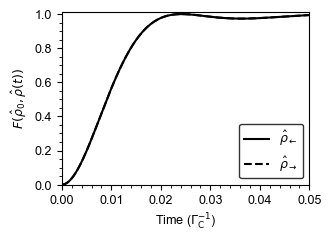

In [6]:
results_4a = q.qload('qobj_files//results_4a')
results_4b = q.qload('qobj_files//results_4b')

max_time_4 = max(results_4a.times)
times_4 = results_4a.times

fig3,ax3 = plt.subplots(figsize=(figwidth_1col*cm,6.33*cm))
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 9}
plt.rc('font', **font)
plt.xlim([0, max_time_4])
plt.ylim([0, 1.01])
plt.plot(
    times_4,
    [
        q.fidelity(code.psi_0, results_4a.states[i].ptrace(0)) ** 2
        for i in range(len(results_4a.states))
    ],
    "k-",
)
plt.plot(
    times_4,
    [
        q.fidelity(code.psi_0, results_4b.states[i].ptrace(0)) ** 2
        for i in range(len(results_4b.states))
    ],
    "k--",
)
plt.xlabel("Time ($\Gamma_{\\text{C}}^{-1}$)")
plt.ylabel("$F (\hat{\\rho}_{0}, \hat{\\rho} (t) )$")

COLOR = 'k'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rc('axes',edgecolor=COLOR)

legend = plt.legend(
    [
        "$\hat{\\rho}_{\leftarrow}$",
        "$\hat{\\rho}_{\\rightarrow}$",
    ], loc='lower right', fancybox=True, shadow=False,frameon=1,ncol=1
)
frame = legend.get_frame()
frame.set_facecolor((1,1,1,1))
frame.set_edgecolor(COLOR)

fig3.patch.set_alpha(1)
ax3.set_facecolor(color=(1,1,1,1))
ax3.minorticks_on()
plt.tight_layout()

# plt.title('Evolution of physical fidelity with correct code state')
plt.savefig("images\simple_correction_2_physfid.pdf",facecolor=fig3.get_facecolor(),dpi=300)
print(f"fidelity of |J_C,m_C-1> state with code state at last time in evolution = {q.fidelity(code.psi_0, results_4a.states[len(results_4a.states) - 1].ptrace(0)) ** 2}")
print(f"fidelity of |J_C,m_C+1> state with code state at last time in evolution = {q.fidelity(code.psi_0, results_4a.states[len(results_4b.states) - 1].ptrace(0)) ** 2}")


Load data and setup for plotting simulation 2 and 3: Logical fidelity evolution with BBR and $J$-repumping only, full DEC, and do nothing

In [7]:
# DATA AND PARAMETERS
repump_factor_elem = 2  # element of repump factor/rate list to do simulations on

results_2a_list = q.qload('qobj_files//results_2a')
results_2b = q.qload('qobj_files//results_2b')
results_2c_list = q.qload('qobj_files//results_2c')
results_2d = q.qload('qobj_files//results_2d')
results_3a = q.qload('qobj_files//results_3a')
results_3b = q.qload('qobj_files//results_3b')
results_3c = q.qload('qobj_files//results_3c')
results_3d = q.qload('qobj_files//results_3d')

times_2a = results_2a_list[repump_factor_elem].times
times_2b = results_2b.times
times_2c = results_2c_list[repump_factor_elem].times
times_2d = results_2d.times
max_time_2 = max(times_2c)
times_3a = results_3a.times
times_3b = results_3b.times
times_3c = results_3c.times
times_3d = results_3d.times
max_time_3 = max(times_3c)
cm = 1/2.54  # centimeters in inches

Plot fidelity evolution for $J$-repumping, full DEC, and do nothing

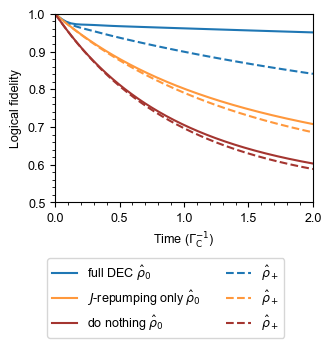

In [8]:
# FIGURE INFORMATION
# fig1,axs = plt.subplots(2,1,figsize=(8.60*cm,14*cm))
fig1,axs = plt.subplots(1,1,figsize=(figwidth_1col*cm,8.75*cm))
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 9}
plt.rc('font', **font)
COLOR = 'k'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rc('axes',edgecolor=COLOR)

# LOGICAL FIDELITY
xlim_fid = [0, max_time_2]
ylim_fid = [0.5, 1]
axs.set_xlim(xlim_fid)
axs.set_ylim(ylim_fid)
axs.plot(
    times_3a,
    (results_3a.expect[9] + 1) / 2,
    "-",
    color='#1F77B4',
    label="full DEC $\hat{\\rho}_0$",
)
axs.plot(
    times_2a,
    (results_2a_list[repump_factor_elem].expect[5] + 1) / 2,
    "-",
    color='#FF983C',
    label="$J$-repumping only $\hat{\\rho}_0$",
)
axs.plot(
    times_2b,
    (results_2b.expect[1] + 1) / 2,
    "-",
    color='#a43530',
    label="do nothing $\hat{\\rho}_0$",
)
axs.plot(
    times_3c,
    (results_3c.expect[10] + 1) / 2,
    "--",
    color='#1F77B4',
    label="$\hat{\\rho}_+$",
    # label="full DEC $|\overline{+}\\rangle$",
)
axs.plot(
    times_2c,
    (results_2c_list[repump_factor_elem].expect[6] + 1) / 2,
    "--",
    color='#FF983C',
    label="$\hat{\\rho}_+$",
    # label="repumping J only $|\overline{+}\\rangle$",
)
axs.plot(
    times_2d,
    (results_2d.expect[2] + 1) / 2,
    "--",
    color='#a43530',
    label="$\hat{\\rho}_+$",
    # label="do nothing $|\overline{+}\\rangle$",
)

axs.set_xlabel("Time ($\Gamma_{\\text{C}}^{-1}$)")
axs.set_ylabel("Logical fidelity")
axs.set_facecolor(color=(1,1,1,1))

# Labels and ticks 
axs.minorticks_on()

# Put a legend below current axis
lines,labels = axs.get_legend_handles_labels()
fig1.legend(lines, labels, loc='lower center', fancybox=True, shadow=False,frameon=1,ncol=2)

# FINALIZE FIGURE AND SAVE
fig1.patch.set_alpha(1)
fig1.tight_layout()
fig1.subplots_adjust(bottom=0.40)  # create space for legend

fig1.savefig("images\\bbr_correction_fid.pdf",facecolor=fig1.get_facecolor(),dpi=300)

Rothinton plots of final states for doing nothing, $J$-repumping, and full DEC for appendix

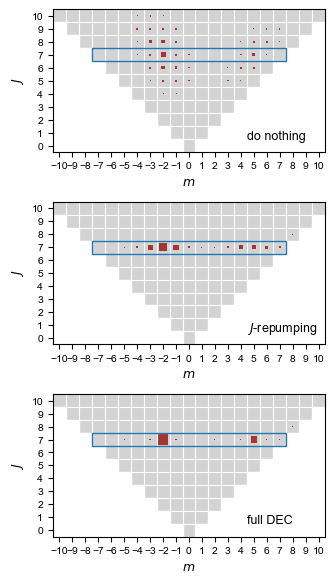

In [9]:
time_idx = -1
psi_sim_list = [
    results_2b.states[time_idx],
    results_2a_list[repump_factor_elem].states[time_idx].ptrace(0),
    results_3a.states[time_idx].ptrace(0)
]

plt.figure(figsize=(figwidth_1col*cm,15*cm))
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 9}
plt.rc('font', **font)
popcolor = '#a43530'
cmidentcolor='#1F77B4'
text_list = ['do nothing', '$J$-repumping', 'full DEC']
for i, psi in enumerate(psi_sim_list):
    plt.subplot(3, 1, i + 1)
    plt.tick_params(axis='both', which='major', labelsize=7.5)
    plt.text(4.5, 0.5, text_list[i], fontsize=9)
    code.rot_hinton(psi, cm_ident=True, cm_ident_color=cmidentcolor,vector_hinton=False, pop_color=popcolor, ax_color='k', ax_facecolor='#D3D3D3',
    ax_bkgdcolor="white",
    label_color="k",
    grid_bool=True,
    grid_color="w")

plt.tight_layout()
plt.savefig("images/bbr_correction_appendix_comparison_rothinton.pdf")

Monte Carlo simulation of fidelity evolution for perfect sequential correction on exact code but no amplitude refreshment

In [10]:
# Monte Carlo simulate fidelity evolution for perfect sequential correction but no amplitude refreshment

# Define initial logical state
logical_plus_list = [[np.sqrt(1/7)],[np.sqrt(5/14)],[np.sqrt(5/14)],[np.sqrt(1/7)]]
logical_plus = np.array(logical_plus_list)
logical_zero_list = [[0],[np.sqrt(5/7)],[0],[np.sqrt(2/7)]]
logical_zero = np.array(logical_zero_list)

# Define amplitude factors for each possible decay and operators from these
decay_operator_list = []
for i in range(-1,2,1):
    for j in (-1,1):
        a = abs(wigner_3j(7 + j,1,7,2 - i,i,-2))
        b = abs(wigner_3j(7 + j,1,7,-5 - i,i,5))
        c = abs(wigner_3j(7 + j,1,7,5 - i,i,-5))
        d = abs(wigner_3j(7 + j,1,7,-2 - i,i,2))
        op = np.diag([c,a,d,b])
        decay_operator_list.append(op)
        
# Define logical operators
logical_x_op = np.zeros((4,4))
logical_x_op[0,3] = 1
logical_x_op[1,2] = 1
logical_x_op[2,1] = 1
logical_x_op[3,0] = 1

logical_z_op = np.zeros((4,4))
logical_z_op[0,0] = -1
logical_z_op[1,1] = 1
logical_z_op[2,2] = -1
logical_z_op[3,3] = 1
        
# Monte carlo simulations
num_errs = 100
num_sims = 100
sim_op_list = []
sim_net_op_list = []
for i in range(num_sims):
    net_op = np.identity(4)
    net_op_list = []
    op_idx_list = np.random.choice(list(range(6)),num_errs) # Random equal weight choice of operator index
    op_list = [decay_operator_list[idx] for idx in op_idx_list]  # Generate random operator list
    sim_op_list.append(op_list)  # append this simulated operator to the simulation operator list
    for j in range(num_errs):
        net_op = np.matmul(op_list[j],net_op)
        net_op_list.append(net_op)
    sim_net_op_list.append(net_op_list)
    
# Compute states, expectation values, and logical fidelities
sim_state_x_list = [[np.matmul(sim_net_op_list[i][j],logical_plus) / np.sqrt(float(np.dot(np.transpose(np.matmul(sim_net_op_list[i][j],logical_plus)),np.matmul(sim_net_op_list[i][j],logical_plus)))) for j in range(num_errs)] for i in range(num_sims)]
sim_expect_x_list = [[float(np.dot(np.transpose(sim_state_x_list[i][j]),np.matmul(logical_x_op,sim_state_x_list[i][j]))) for j in range(num_errs)] for i in range(num_sims)]
sim_fidelity_x_list = [[(1 + sim_expect_x_list[i][j])/2 for j in range(num_errs)] for i in range(num_sims)]
sim_fidelity_x_mean_list = [np.mean([sim_fidelity_x_list[i][j] for i in range(num_sims)]) for j in range(num_errs)]
sim_fidelity_x_cilo_list = [sms.DescrStatsW([sim_fidelity_x_list[i][j] for i in range(num_sims)]).tconfint_mean()[0] for j in range(num_errs)]
sim_fidelity_x_cihi_list = [sms.DescrStatsW([sim_fidelity_x_list[i][j] for i in range(num_sims)]).tconfint_mean()[1] for j in range(num_errs)]

sim_state_z_list = [[np.matmul(sim_net_op_list[i][j],logical_zero) / np.sqrt(float(np.dot(np.transpose(np.matmul(sim_net_op_list[i][j],logical_zero)),np.matmul(sim_net_op_list[i][j],logical_zero)))) for j in range(num_errs)] for i in range(num_sims)]
sim_expect_z_list = [[float(np.dot(np.transpose(sim_state_z_list[i][j]),np.matmul(logical_z_op,sim_state_z_list[i][j]))) for j in range(num_errs)] for i in range(num_sims)]
sim_fidelity_z_list = [[(1 + sim_expect_z_list[i][j])/2 for j in range(num_errs)] for i in range(num_sims)]
sim_fidelity_z_mean_list = [np.mean([sim_fidelity_z_list[i][j] for i in range(num_sims)]) for j in range(num_errs)]
sim_fidelity_z_cilo_list = [sms.DescrStatsW([sim_fidelity_z_list[i][j] for i in range(num_sims)]).tconfint_mean()[0] for j in range(num_errs)]
sim_fidelity_z_cihi_list = [sms.DescrStatsW([sim_fidelity_z_list[i][j] for i in range(num_sims)]).tconfint_mean()[1] for j in range(num_errs)]  
        


C:\Users\c7041294\AppData\Local\Temp\ipykernel_2332\495119770.py:50: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sim_state_x_list = [[np.matmul(sim_net_op_list[i][j],logical_plus) / np.sqrt(float(np.dot(np.transpose(np.matmul(sim_net_op_list[i][j],logical_plus)),np.matmul(sim_net_op_list[i][j],logical_plus)))) for j in range(num_errs)] for i in range(num_sims)]
C:\Users\c7041294\AppData\Local\Temp\ipykernel_2332\495119770.py:51: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sim_expect_x_list = [[float(np.dot(np.transpose(sim_state_x_list[i][j]),np.matmul(logical_x_op,sim_state_x_list[i][j]))) for j in range(num_errs)] for i in range(num

Plot Monte Carlo simulation of exact code

paramater 0 = 0.12399500757710209 +\- 0.004086596905137791
paramater 1 = 0.23876946832914542 +\- 0.008256518565537087


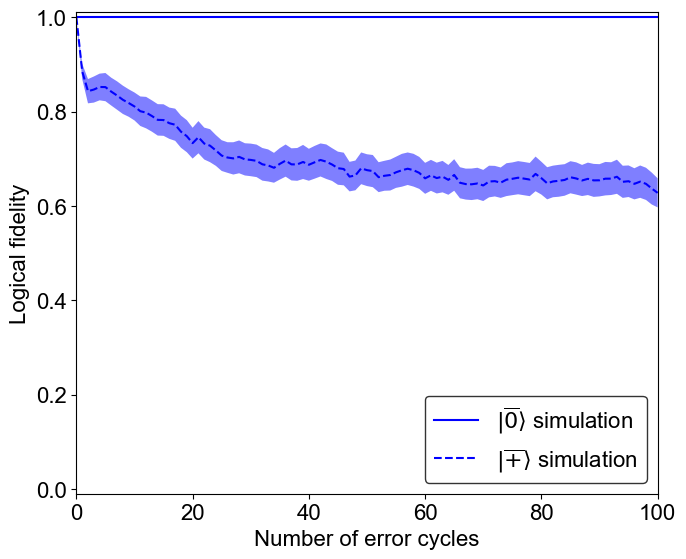

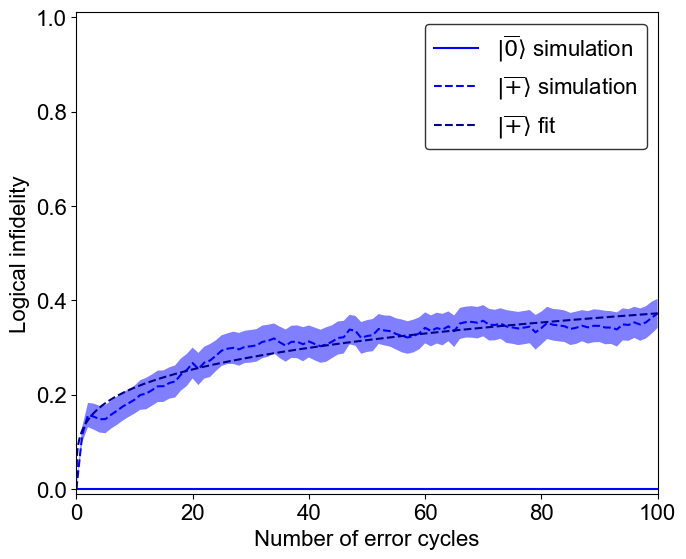

In [13]:
# Fit data
def power_law(x,a,b):
    y = a*x**b
    return y

def sqrt_cdf(x,a):
    y = np.sqrt(1 - np.exp(-a*x))
    return y

def qurt_cdf(x,a):
    y = (1 - np.exp(-a*x))**(1/4)
    return y

def cdf(x,a):
    y = 1 - np.exp(-a*x)
    return y

# Plot logical fidelity vs. number of errors
fig,ax = plt.subplots(figsize=(7.50,6.25))
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)
xlim_fid = [0, num_errs]
ylim_fid = [-0.01, 1.01]
plt.xlim(xlim_fid)
plt.ylim(ylim_fid)
xdata = np.arange(0,num_errs + 1)
xdata2 = np.linspace(0,num_errs,1000)

plot_1 = ax.fill_between(
    xdata,
    [1] + sim_fidelity_z_cilo_list, [1] + sim_fidelity_z_cihi_list,
    facecolor='blue',
    alpha=0.5
)

plot_2 = ax.plot(
    xdata,
    [1] + sim_fidelity_z_mean_list,
    "-",
    color='blue',
    label="$|\overline{0}\\rangle$ simulation",
)

plot_3 = ax.fill_between(
    xdata,
    [1] + sim_fidelity_x_cilo_list, [1] + sim_fidelity_x_cihi_list,
    facecolor='blue',
    alpha=0.5
)

plot_4 = ax.plot(
    xdata,
    [1] + sim_fidelity_x_mean_list,
    "--",
    color='blue',
    label="$|\overline{+}\\rangle$ simulation",
)

plt.xlabel("Number of error cycles")
plt.ylabel("Logical fidelity")

COLOR = 'k'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rc('axes',edgecolor=COLOR)

legend = plt.legend(frameon=1,ncol=1,loc='lower right')
frame = legend.get_frame()
frame.set_facecolor((1,1,1,1))
frame.set_edgecolor(COLOR)

fig.patch.set_alpha(0)
ax.set_facecolor(color=(1,1,1,1))
plt.savefig("images\\perfect_qec_no_amp_refresh_logical_fidelity.pdf",facecolor=fig.get_facecolor(),dpi=300) 

# Logical infidelities
sim_infidelity_z_mean_list = [1 - fid for fid in sim_fidelity_z_mean_list]
sim_infidelity_z_cilo_list = [1 - cihi for cihi in sim_fidelity_z_cihi_list]
sim_infidelity_z_cihi_list = [1 - cilo for cilo in sim_fidelity_z_cilo_list]
sim_infidelity_x_mean_list = [1 - fid for fid in sim_fidelity_x_mean_list]
sim_infidelity_x_cilo_list = [1 - cihi for cihi in sim_fidelity_x_cihi_list]
sim_infidelity_x_cihi_list = [1 - cilo for cilo in sim_fidelity_x_cilo_list]

# Fit data
parameters, covariance = opt.curve_fit(power_law,list(np.arange(1,num_errs + 1)),sim_infidelity_x_mean_list,p0=[1.0,0.5],bounds=[[0,0],[np.inf,np.inf]])
print(f"paramater 0 = {parameters[0]} +\- {np.sqrt(np.diag(covariance))[0]}")
print(f"paramater 1 = {parameters[1]} +\- {np.sqrt(np.diag(covariance))[1]}")

# Plot logical infidelity vs. number of errors
fig,ax = plt.subplots(figsize=(7.50,6.25))
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)
xlim_infid = [0, num_errs]
ylim_infid = [-0.01, 1.01]
plt.xlim(xlim_infid)
plt.ylim(ylim_infid)
xdata = np.arange(0,num_errs + 1)
xdata2 = np.linspace(0,num_errs,1000)

plot_1 = ax.fill_between(
    xdata,
    [0] + sim_infidelity_z_cilo_list, [0] + sim_infidelity_z_cihi_list,
    facecolor='blue',
    alpha=0.5
)

plot_2 = ax.plot(
    xdata,
    [0] + sim_infidelity_z_mean_list,
    "-",
    color='blue',
    label="$|\overline{0}\\rangle$ simulation",
)

plot_4 = ax.fill_between(
    xdata,
    [0] + sim_infidelity_x_cilo_list, [0] + sim_infidelity_x_cihi_list,
    facecolor='blue',
    alpha=0.5
)

plot_5 = ax.plot(
    xdata,
    [0] + sim_infidelity_x_mean_list,
    "--",
    color='blue',
    label="$|\overline{+}\\rangle$ simulation",
)

plot_6 = ax.plot(
    xdata2,
    power_law(xdata2,parameters[0],parameters[1]),
    "--",
    color='darkblue',
    label="$|\overline{+}\\rangle$ fit",
)

plt.xlabel("Number of error cycles")
plt.ylabel("Logical infidelity")
# plt.title('Evolution of fidelities')

COLOR = 'k'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rc('axes',edgecolor=COLOR)

legend = plt.legend(frameon=1,ncol=1,loc='best')
frame = legend.get_frame()
frame.set_facecolor((1,1,1,1))
frame.set_edgecolor(COLOR)

fig.patch.set_alpha(0)
ax.set_facecolor(color=(1,1,1,1))
plt.savefig("images\\perfect_qec_no_amp_refresh_logical_infidelity.pdf",facecolor=fig.get_facecolor(),dpi=300) 

Monte Carlo simulation of fidelity evolution for perfect sequential correction of approximate code with no amplitude refreshment

In [14]:
# Monte Carlo simulate fidelity evolution for perfect sequential correction but no amplitude refreshment of APPROXIMATE CODE

# Define initial logical state
logical_plus_list_a = [[0],[np.sqrt(1/2)],[np.sqrt(1/2)],[np.sqrt(0)]]
logical_plus_a = np.array(logical_plus_list_a)
logical_zero_list_a = [[0],[1],[0],[0]]
logical_zero_a = np.array(logical_zero_list_a)
        
# Monte carlo simulations
num_errs_a = 100
num_sims_a = 100
sim_op_list_a = []
sim_net_op_list_a = []
for i in range(num_sims_a):
    net_op_a = np.identity(4)
    net_op_list_a = []
    op_idx_list_a = np.random.choice(list(range(6)),num_errs_a) # Random equal weight choice of operator index
    op_list_a = [decay_operator_list[idx] for idx in op_idx_list_a]  # Generate random operator list
    sim_op_list_a.append(op_list_a)  # append this simulated operator to the simulation operator list
    for j in range(num_errs_a):
        net_op_a = np.matmul(op_list_a[j],net_op_a)
        net_op_list_a.append(net_op_a)
    sim_net_op_list_a.append(net_op_list_a)
    
# Compute states, expectation values, and logical fidelities
sim_state_x_list_a = [[np.matmul(sim_net_op_list_a[i][j],logical_plus_a) / np.sqrt(float(np.dot(np.transpose(np.matmul(sim_net_op_list_a[i][j],logical_plus_a)),np.matmul(sim_net_op_list_a[i][j],logical_plus_a)))) for j in range(num_errs_a)] for i in range(num_sims_a)]
sim_expect_x_list_a = [[float(np.dot(np.transpose(sim_state_x_list_a[i][j]),np.matmul(logical_x_op,sim_state_x_list_a[i][j]))) for j in range(num_errs_a)] for i in range(num_sims_a)]
sim_fidelity_x_list_a = [[(1 + sim_expect_x_list_a[i][j])/2 for j in range(num_errs_a)] for i in range(num_sims_a)]
sim_fidelity_x_mean_list_a = [np.mean([sim_fidelity_x_list_a[i][j] for i in range(num_sims_a)]) for j in range(num_errs_a)]
sim_fidelity_x_cilo_list_a = [sms.DescrStatsW([sim_fidelity_x_list_a[i][j] for i in range(num_sims_a)]).tconfint_mean()[0] for j in range(num_errs_a)]
sim_fidelity_x_cihi_list_a = [sms.DescrStatsW([sim_fidelity_x_list_a[i][j] for i in range(num_sims_a)]).tconfint_mean()[1] for j in range(num_errs_a)]

sim_state_z_list_a = [[np.matmul(sim_net_op_list_a[i][j],logical_zero_a) / np.sqrt(float(np.dot(np.transpose(np.matmul(sim_net_op_list_a[i][j],logical_zero_a)),np.matmul(sim_net_op_list_a[i][j],logical_zero_a)))) for j in range(num_errs_a)] for i in range(num_sims_a)]
sim_expect_z_list_a = [[float(np.dot(np.transpose(sim_state_z_list_a[i][j]),np.matmul(logical_z_op,sim_state_z_list_a[i][j]))) for j in range(num_errs_a)] for i in range(num_sims_a)]
sim_fidelity_z_list_a = [[(1 + sim_expect_z_list_a[i][j])/2 for j in range(num_errs_a)] for i in range(num_sims_a)]
sim_fidelity_z_mean_list_a = [np.mean([sim_fidelity_z_list_a[i][j] for i in range(num_sims_a)]) for j in range(num_errs_a)]
sim_fidelity_z_cilo_list_a = [sms.DescrStatsW([sim_fidelity_z_list_a[i][j] for i in range(num_sims_a)]).tconfint_mean()[0] for j in range(num_errs_a)]
sim_fidelity_z_cihi_list_a = [sms.DescrStatsW([sim_fidelity_z_list_a[i][j] for i in range(num_sims_a)]).tconfint_mean()[1] for j in range(num_errs_a)]  

C:\Users\c7041294\AppData\Local\Temp\ipykernel_2332\90074057.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sim_state_x_list_a = [[np.matmul(sim_net_op_list_a[i][j],logical_plus_a) / np.sqrt(float(np.dot(np.transpose(np.matmul(sim_net_op_list_a[i][j],logical_plus_a)),np.matmul(sim_net_op_list_a[i][j],logical_plus_a)))) for j in range(num_errs_a)] for i in range(num_sims_a)]
C:\Users\c7041294\AppData\Local\Temp\ipykernel_2332\90074057.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sim_expect_x_list_a = [[float(np.dot(np.transpose(sim_state_x_list_a[i][j]),np.matmul(logical_x_op,sim_state_x_list_a[i][j]))) for j in range(num_err

Plot Monte Carlo simulation of approximate code

paramater 0 = 0.12399500757710209 +/- 0.004086596905137791
paramater 1 = 0.23876946832914542 +/- 0.008256518565537087
paramater 0a = 0.10779613775284802 +/- 0.0038358861725230915
paramater 1a = 0.2657846537442937 +/- 0.008871421962844475


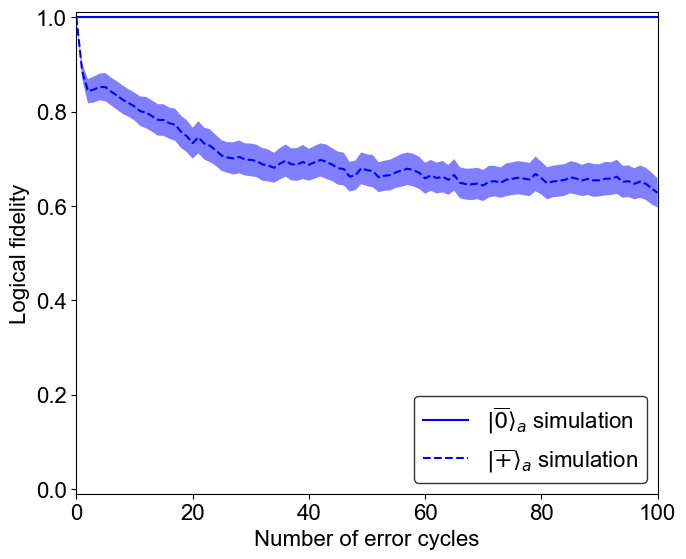

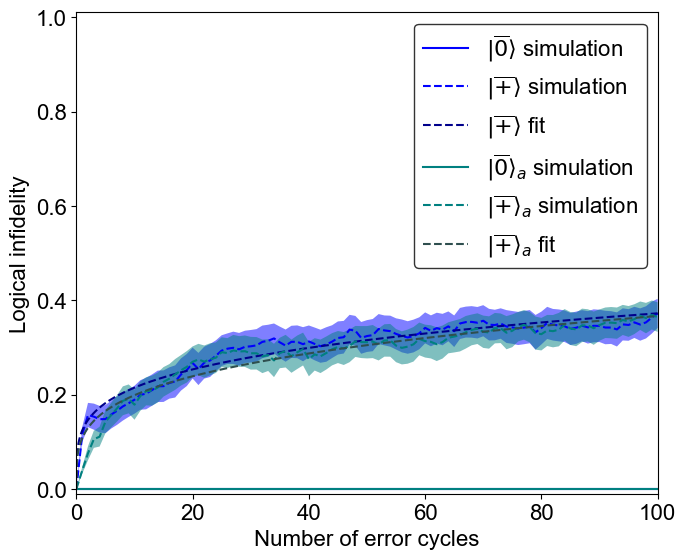

In [15]:
# Fit data
def power_law(x,a,b):
    y = a*x**b
    return y

def sqrt_cdf(x,a):
    y = np.sqrt(1 - np.exp(-a*x))
    return y

def qurt_cdf(x,a):
    y = (1 - np.exp(-a*x))**(1/4)
    return y

def cdf(x,a):
    y = 1 - np.exp(-a*x)
    return y

# Plot logical fidelity vs. number of errors
fig,ax = plt.subplots(figsize=(7.50,6.25))
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)
xlim_fid = [0, num_errs]
ylim_fid = [-0.01, 1.01]
plt.xlim(xlim_fid)
plt.ylim(ylim_fid)
xdata = np.arange(0,num_errs + 1)
xdata2 = np.linspace(0,num_errs,1000)

plot_1 = ax.fill_between(
    xdata,
    [1] + sim_fidelity_z_cilo_list, [1] + sim_fidelity_z_cihi_list,
    facecolor='blue',
    alpha=0.5
)

plot_2 = ax.plot(
    xdata,
    [1] + sim_fidelity_z_mean_list,
    "-",
    color='blue',
    label="$|\overline{0}\\rangle_a$ simulation",
)

plot_3 = ax.fill_between(
    xdata,
    [1] + sim_fidelity_x_cilo_list, [1] + sim_fidelity_x_cihi_list,
    facecolor='blue',
    alpha=0.5
)

plot_4 = ax.plot(
    xdata,
    [1] + sim_fidelity_x_mean_list,
    "--",
    color='blue',
    label="$|\overline{+}\\rangle_a$ simulation",
)

plt.xlabel("Number of error cycles")
plt.ylabel("Logical fidelity")
# plt.title('Evolution of fidelities')

COLOR = 'k'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rc('axes',edgecolor=COLOR)

legend = plt.legend(frameon=1,ncol=1,loc='lower right')
frame = legend.get_frame()
frame.set_facecolor((1,1,1,1))
frame.set_edgecolor(COLOR)

fig.patch.set_alpha(0)
ax.set_facecolor(color=(1,1,1,1))
plt.savefig("images\\approximate_code_perfect_qec_no_amp_refresh_logical_fidelity.pdf",facecolor=fig.get_facecolor(),dpi=300) 



# Logical infidelities
sim_infidelity_z_mean_list = [1 - fid for fid in sim_fidelity_z_mean_list]
sim_infidelity_z_cilo_list = [1 - cihi for cihi in sim_fidelity_z_cihi_list]
sim_infidelity_z_cihi_list = [1 - cilo for cilo in sim_fidelity_z_cilo_list]
sim_infidelity_x_mean_list = [1 - fid for fid in sim_fidelity_x_mean_list]
sim_infidelity_x_cilo_list = [1 - cihi for cihi in sim_fidelity_x_cihi_list]
sim_infidelity_x_cihi_list = [1 - cilo for cilo in sim_fidelity_x_cilo_list]

sim_infidelity_z_mean_list_a = [1 - fid  for fid in  sim_fidelity_z_mean_list_a]
sim_infidelity_z_cilo_list_a = [1 - cihi for cihi in sim_fidelity_z_cihi_list_a]
sim_infidelity_z_cihi_list_a = [1 - cilo for cilo in sim_fidelity_z_cilo_list_a]
sim_infidelity_x_mean_list_a = [1 - fid  for fid in  sim_fidelity_x_mean_list_a]
sim_infidelity_x_cilo_list_a = [1 - cihi for cihi in sim_fidelity_x_cihi_list_a]
sim_infidelity_x_cihi_list_a = [1 - cilo for cilo in sim_fidelity_x_cilo_list_a]

# Fit data
parameters, covariance = opt.curve_fit(power_law,list(np.arange(1,num_errs + 1)),sim_infidelity_x_mean_list,p0=[1.0,0.5],bounds=[[0,0],[np.inf,np.inf]])
parameters_a, covariance_a = opt.curve_fit(power_law,list(np.arange(1,num_errs_a + 1)),sim_infidelity_x_mean_list_a,p0=[1.0,0.5],bounds=[[0,0],[np.inf,np.inf]])
print(f"paramater 0 = {parameters[0]} +/- {np.sqrt(np.diag(covariance))[0]}")
print(f"paramater 1 = {parameters[1]} +/- {np.sqrt(np.diag(covariance))[1]}")
print(f"paramater 0a = {parameters_a[0]} +/- {np.sqrt(np.diag(covariance_a))[0]}")
print(f"paramater 1a = {parameters_a[1]} +/- {np.sqrt(np.diag(covariance_a))[1]}")

# Plot logical infidelity vs. number of errors
fig,ax = plt.subplots(figsize=(7.50,6.25))
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)
xlim_infid = [0, num_errs]
ylim_infid = [-0.01, 1.01]
plt.xlim(xlim_infid)
plt.ylim(ylim_infid)
xdata = np.arange(0,num_errs + 1)
xdata2 = np.linspace(0,num_errs,1000)

plot_1 = ax.fill_between(
    xdata,
    [0] + sim_infidelity_z_cilo_list, [0] + sim_infidelity_z_cihi_list,
    facecolor='blue',
    alpha=0.5
)

plot_2 = ax.plot(
    xdata,
    [0] + sim_infidelity_z_mean_list,
    "-",
    color='blue',
    label="$|\overline{0}\\rangle$ simulation",
)

plot_4 = ax.fill_between(
    xdata,
    [0] + sim_infidelity_x_cilo_list, [0] + sim_infidelity_x_cihi_list,
    facecolor='blue',
    alpha=0.5
)

plot_5 = ax.plot(
    xdata,
    [0] + sim_infidelity_x_mean_list,
    "--",
    color='blue',
    label="$|\overline{+}\\rangle$ simulation",
)

plot_6 = ax.plot(
    xdata2,
    power_law(xdata2,parameters[0],parameters[1]),
    "--",
    color='darkblue',
    label="$|\overline{+}\\rangle$ fit",
)

plot_1_a = ax.fill_between(
    xdata,
    [0] + sim_infidelity_z_cilo_list_a, [0] + sim_infidelity_z_cihi_list_a,
    facecolor='teal',
    alpha=0.5
)

plot_2_a = ax.plot(
    xdata,
    [0] + sim_infidelity_z_mean_list_a,
    "-",
    color='teal',
    label="$|\overline{0}\\rangle_a$ simulation",
)

plot_4_a = ax.fill_between(
    xdata,
    [0] + sim_infidelity_x_cilo_list_a, [0] + sim_infidelity_x_cihi_list_a,
    facecolor='teal',
    alpha=0.5
)

plot_5_a = ax.plot(
    xdata,
    [0] + sim_infidelity_x_mean_list_a,
    "--",
    color='teal',
    label="$|\overline{+}\\rangle_a$ simulation",
)

plot_6_a = ax.plot(
    xdata2,
    power_law(xdata2,parameters_a[0],parameters_a[1]),
    "--",
    color='darkslategray',
    label="$|\overline{+}\\rangle_a$ fit",
)



plt.xlabel("Number of error cycles")
plt.ylabel("Logical infidelity")
# plt.title('Evolution of fidelities')

COLOR = 'k'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rc('axes',edgecolor=COLOR)

legend = plt.legend(frameon=1,ncol=1,loc='best')
frame = legend.get_frame()
frame.set_facecolor((1,1,1,1))
frame.set_edgecolor(COLOR)

fig.patch.set_alpha(0)
ax.set_facecolor(color=(1,1,1,1))
plt.savefig("images\\approximate_code_perfect_qec_no_amp_refresh_logical_infidelity.pdf",facecolor=fig.get_facecolor(),dpi=300) 